# XCEPTION

Machine-Learning-Tokyo/CNN-Architectures

In [1]:
from tensorflow.keras.layers import Input, Conv2D, SeparableConv2D, \
    Add, Dense, BatchNormalization, ReLU, MaxPool2D, GlobalAvgPool2D

## 2.1 Conv-BatchNorm Block

In [2]:
def conv_bn(x, filters, kernel_size, strides=1):
    x = Conv2D(filters, kernel_size=kernel_size, strides=strides, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

## 2.2 SeparableConv-Batch Norm

In [3]:
def sep_bn(x, filters, kernel_size, strides=1):
    x = SeparableConv2D(filters, kernel_size=kernel_size, strides=strides, padding='same', use_bias=False)(x)
    x = BatchNormalization()(x)
    return x

## 3.1 Entry Flow

![pict](image/entry_flow.jpg)

In [4]:
def entry_flow(x):
    x = conv_bn(x, filters=32, kernel_size=3, strides=2)
    x = ReLU()(x)
    x = conv_bn(x, filters=64, kernel_size=3)
    tensor = ReLU()(x)

    x = sep_bn(tensor, filters=128, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=128, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=128, kernel_size=1, strides=2)
    x = Add()([tensor, x]) 
    x = ReLU()(x)
    x = sep_bn(x, filters=256, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=256, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)

    tensor = conv_bn(tensor, filters=256, kernel_size=1, strides=2)
    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    tensor = conv_bn(tensor, filters=728, kernel_size=1, strides=2)
    x = Add()([tensor, x])

    return x

## 3.2. Middle Flow

![pict](image/middle_flow.jpg)

In [5]:
def middle_flow(tensor):
    for _ in range(8):
        x = ReLU()(tensor)
        x = sep_bn(x, filters=728, kernel_size=3)
        x = ReLU()(x)
        x = sep_bn(x, filters=728, kernel_size=3)
        x = ReLU()(x)
        x = sep_bn(x, filters=728, kernel_size=3)
        tensor = Add()([tensor, x])
    return tensor


## 3.3. Exit Flow

![pict](image/exit_flow.jpg)

In [6]:
def exit_flow(tensor):
    x = ReLU()(tensor)
    x = sep_bn(x, filters=728, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=1024, kernel_size=3)
    x = MaxPool2D(pool_size=3, strides=2, padding='same')(x)
    tensor = conv_bn(tensor, filters=1024, kernel_size=1, strides=2)
    x = Add()([tensor, x])
    x = ReLU()(x)
    x = sep_bn(x, filters=1536, kernel_size=3)
    x = ReLU()(x)
    x = sep_bn(x, filters=2048, kernel_size=3)
    x = ReLU()(x)
    x = GlobalAvgPool2D()(x)
    x = Dense(units=1000, activation='softmax')(x)
    return x

## 4. Model Code

![pict](image/model_code.jpg)

In [7]:
input = Input(shape=(299, 299, 3))
x = entry_flow(input)
x = middle_flow(x)
output = exit_flow(x)


from tensorflow.keras import Model
model = Model(inputs=input, outputs=output)

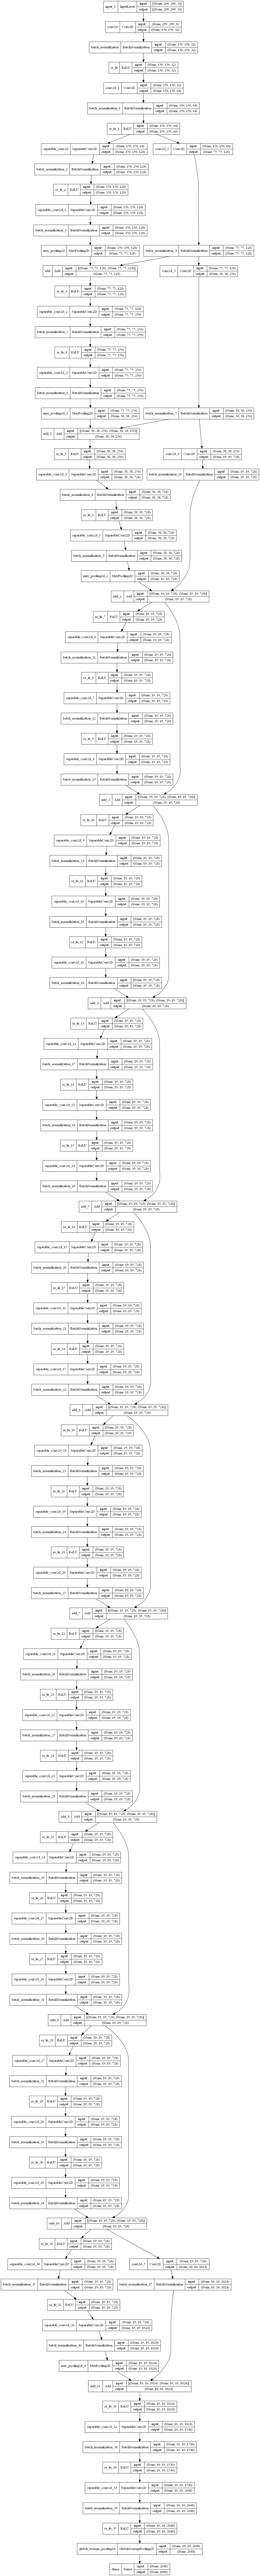

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [9]:
import numpy as np
import tensorflow.keras.backend as K 
np.sum([K.count_params(p) for p in model.trainable_weights])

22855952

![pict](image/conclusion.jpg)